In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [77]:
import warnings
warnings.filterwarnings(action='ignore')

In [64]:
norm = pd.read_excel('정규화 데이터.xlsx')
norm.head(2)

,Unnamed: 0,시도코드,시도명칭,시군구코드,시군구명칭2,corona_i,visitors_i,rest_i,trans_i,accom_i,outdoor_i,jisoo,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15
0,0,11,서울특별시,11010,종로구,0.561973,0.535179,0.072467,0.154472,0.27853,0.246234,7.65455,NaN,NaN,NaN,NaN
1,1,11,서울특별시,11020,중구,1.000000,0.689380,0.000879,0.195122,0.55268,0.000000,7.05930,NaN,NaN,NaN,NaN


In [65]:
norm = norm.drop(["Unnamed: 0","Unnamed: 12", "Unnamed: 13", "Unnamed: 14", "Unnamed: 15"], 1)
norm.head(2)

,시도코드,시도명칭,시군구코드,시군구명칭2,corona_i,visitors_i,rest_i,trans_i,accom_i,outdoor_i,jisoo
0,11,서울특별시,11010,종로구,0.561973,0.535179,0.072467,0.154472,0.27853,0.246234,7.65455
1,11,서울특별시,11020,중구,1.000000,0.689380,0.000879,0.195122,0.55268,0.000000,7.05930


In [66]:
# 시군구명 합치기
cols = ['시도명칭', '시군구명칭2']
norm['sigoongu'] = norm[cols].apply(lambda row: ' '.join(row.values.astype(str)), axis=1)
norm.head(2)

,시도코드,시도명칭,시군구코드,시군구명칭2,corona_i,visitors_i,rest_i,trans_i,accom_i,outdoor_i,jisoo,sigoongu
0,11,서울특별시,11010,종로구,0.561973,0.535179,0.072467,0.154472,0.27853,0.246234,7.65455,서울특별시 종로구
1,11,서울특별시,11020,중구,1.000000,0.689380,0.000879,0.195122,0.55268,0.000000,7.05930,서울특별시 중구


In [67]:
# 필요없는 컬럼 없애기
norm = norm.drop(["시도코드","시도명칭", "시군구명칭2"], 1)
norm.head(2)

,시군구코드,corona_i,visitors_i,rest_i,trans_i,accom_i,outdoor_i,jisoo,sigoongu
0,11010,0.561973,0.535179,0.072467,0.154472,0.27853,0.246234,7.65455,서울특별시 종로구
1,11020,1.000000,0.689380,0.000879,0.195122,0.55268,0.000000,7.05930,서울특별시 중구


### 기술통계

In [68]:
norm.describe()

,시군구코드,corona_i,visitors_i,rest_i,trans_i,accom_i,outdoor_i,jisoo
count,229.000000,229.000000,2.290000e+02,229.000000,229.000000,229.000000,229.000000,229.000000
mean,29553.187773,0.156556,1.323413e-01,0.127253,0.096851,0.168418,0.056013,8.159639
std,8335.456915,0.124832,1.308477e-01,0.117597,0.121930,0.179193,0.133732,0.356067
min,11010.000000,0.000000,-6.100000e-08,0.000000,0.000000,0.000000,0.000000,7.059300
25%,23310.000000,0.068486,5.000838e-02,0.060971,0.024390,0.043910,0.000000,7.946505
50%,32320.000000,0.127563,8.804930e-02,0.106177,0.056911,0.109770,0.006131,8.121672
75%,36330.000000,0.207153,1.743551e-01,0.151407,0.121951,0.230510,0.044370,8.342830
max,39020.000000,1.000000,9.999999e-01,1.000000,1.000000,1.000000,1.000000,9.679625


([<matplotlib.axis.XTick at 0x19923a8a0a0>,
 [Text(1, 0, 'corona_i'),
  Text(2, 0, 'visitors_i'),
  Text(3, 0, 'rest_i'),
  Text(4, 0, 'trans_i'),
  Text(5, 0, 'accom_i'),
  Text(6, 0, 'outdoor_i')])

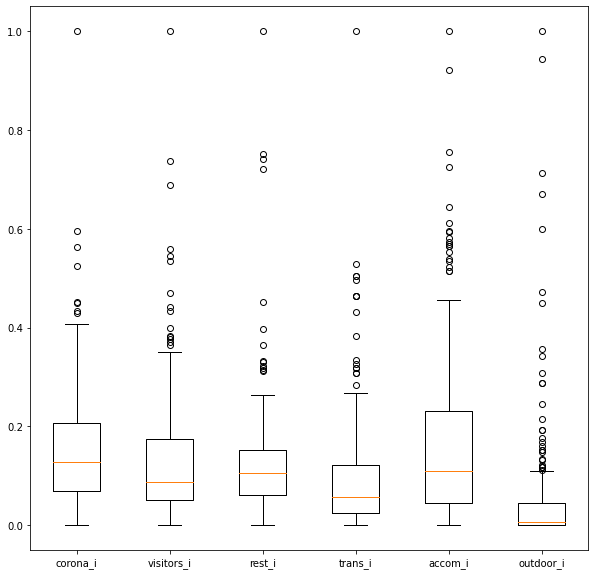

In [81]:
data = [norm['corona_i'], norm['visitors_i'],norm['rest_i'], norm['trans_i'],norm['accom_i'], norm['outdoor_i']]

plt.figure(figsize=(10,10))
plt.boxplot(data)
plt.xticks([1, 2, 3, 4, 5, 6], ['corona_i', 'visitors_i', 'rest_i', 'trans_i', 'accom_i', 'outdoor_i'])

### EDA

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\jai19\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\jai19\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\jai19\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 53076 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\jai19\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 46300 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\jai19\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44400 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\jai19\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44396 missing from c

C:\Users\jai19\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51204 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\jai19\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 52404 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\jai19\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49885 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\jai19\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 45817 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\jai19\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50504 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\jai19\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49900 missing from c

C:\Users\jai19\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\jai19\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\jai19\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 53076 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\jai19\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 46300 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\jai19\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 44400 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\jai19\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 44396 missing from current fon

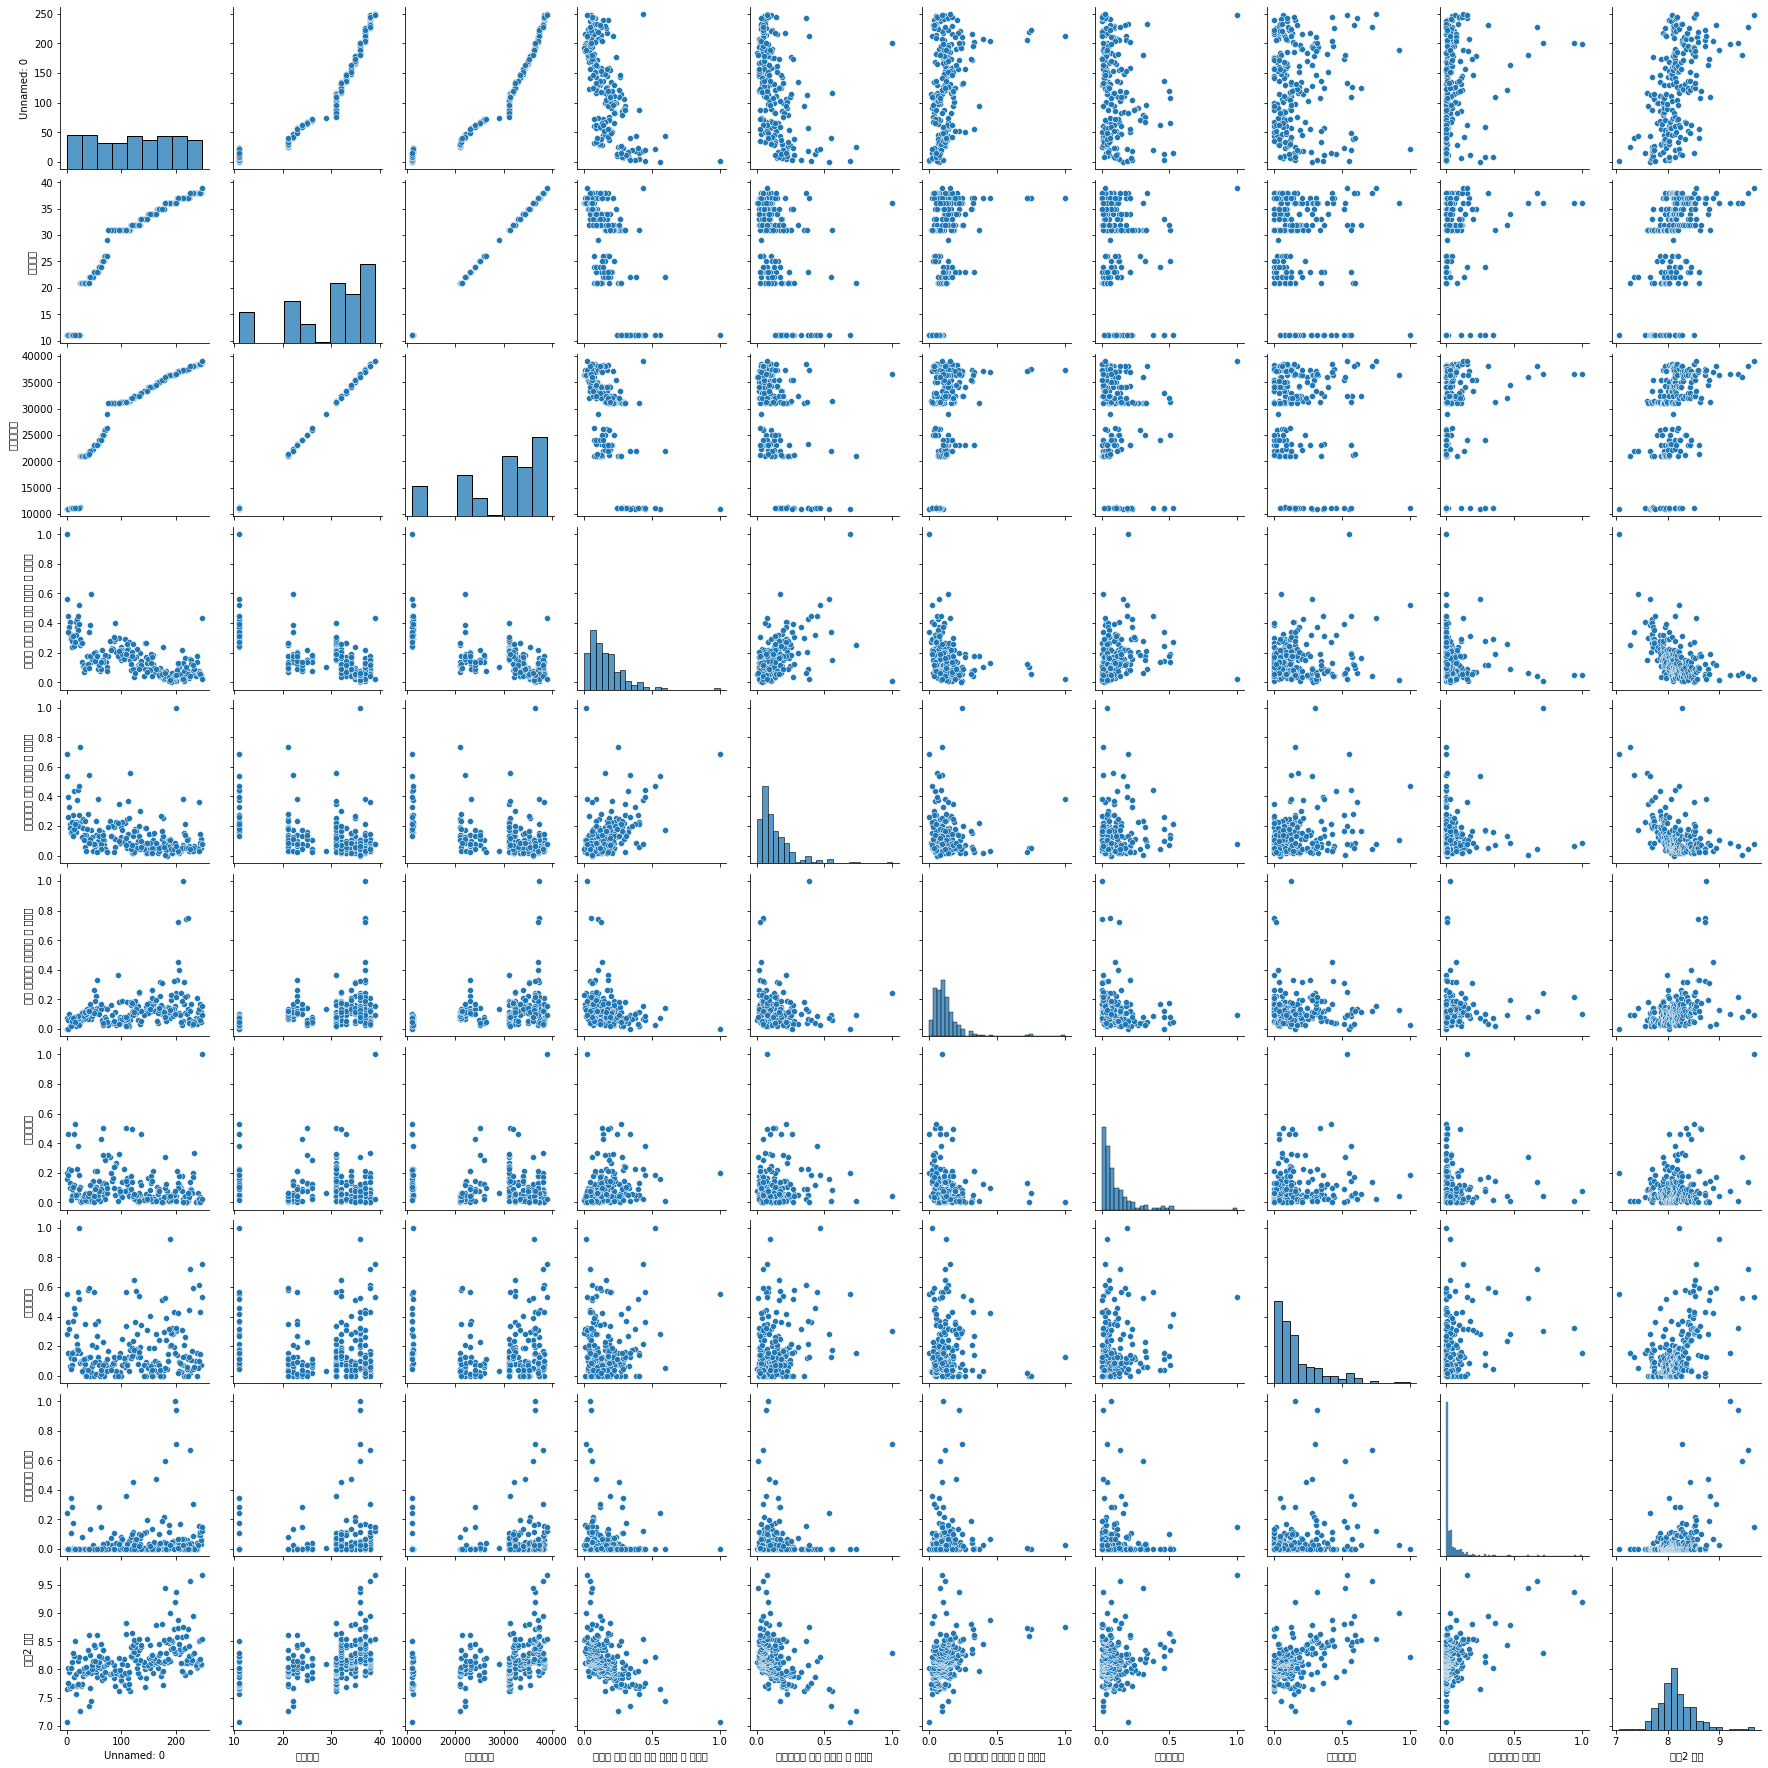

In [51]:
sns.pairplot(norm)

### Bar Plot

['NanumBarunGothic']


<BarContainer object of 10 artists>

C:\Users\jai19\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49436 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\jai19\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50872 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\jai19\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\jai19\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 48324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\jai19\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\jai19\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51473 missing from c

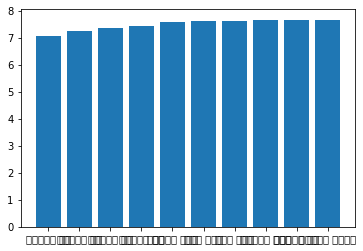

In [49]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc



font_path = "NanumBarunGothic.ttf"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

plt.rc('font', family='NanumBarunGothic')
print(plt.rcParams['font.family'])

norm = norm.sort_values(by='방법2 지수')
norm_top10 = norm[:10]
plt.bar(norm_top10['시군구명 합치기'], norm_top10['방법2 지수'])

### 회귀분석

In [50]:
from statsmodels.formula.api import ols
ols('방법2 지수 ~ 시군구 인구 대비 평균 확진자_수 정규화 ', norm).fit.summary()

SyntaxError: invalid syntax (<unknown>, line 1)